GO BULLISH:

---


USE OF DATA COLLECTED FROM USERS: We use data collected from the users for feedback and quality control purposes only. We will not disclose any personal information about the user. We may contact you through email to help us improve our content better by using your valuable feedbacks and suggestions. The views, suggestions, comments and feedbacks expressed by the user are their personal views/ suggestions/ feedbacks. Go Bullish does not represent the aforesaid views/ suggestions/ feedbacks and does not guarantee their accuracy, adequacy, validity or completeness. 

---


TERMS AND CONDITIONS:
 Before accessing the webpage,please read these given terms and conditions. Your use and access of this service is determined through confirmation of these terms. These terms apply to all the visitors, users and others who accesses or uses this service. By using or accessing this service you agree to abide by the terms given below. If you disagree with any one of the terms then you will not be allowed to access the service. 
 1)You must not upload any type of virus or any malicious code or do anything that could prevent the proper functioning or appearance of our website.

  2)All information provided by this platform is in good faith, however we make no warranty or representation of any type, implied or express, concerning the reliability, accuracy, adequacy, sustainability or wholeness of any information provided by our application.

 3)We will have no responsibility or accountability to you for any type of loss or damage that you must have sustained as a result of using this website or your reliance on any information provided by our website.

  4)The data sources for the website is sourced and administered using automated algorithms from various data sources. The comments and opinions on the site are based on computerized formulas. These are prone to errors of automation. Therefore, your use of this website and your dependency on any information given in this platform is solely at your own risk.

  5)We may make changes to the materials contained on Site on any occasion without any prior notice. However, we make no commitment to update the materials present on Site. 

  6)We have not reviewed all of the links which are present on the feedbacks section and therefore, we are not responsible for any content present in such linked website or any link present in the linked website. The inclusion of any link does not apply our recommendation. Use of any such link is at user's own risk.

   7)You must not republish any content or material from this website . This includes republication of our content on any another website or any other medium including but not limited to over the radio broadcast , over an on-air television or a computer network without the consent of Go Bullish team.

   8)You must not sublicense, sell or rent material from the website. In addition to this, you must also not remove, alter or conceal any copyright, legal or trademark notices in or on any portions of this site without prior authorization of GO BULLISH representatives. 
   
   9)You must not reproduce, duplicate, copy or otherwise exploit materials available on this website. All the content on the site is protected by copyright claims.
   
   10)We are not responsible for any type of damage or liability occurring, indirectly or directly, from set backs or disturbances due to hardware failures, telephone interconnection problems, software or any other faults.
   
   11)The website may contain information collected from third parties. We are not responsible for any content or information provided by these third parties. The inclusion of any such content or information does not apply our endorsement. We may destroy or delete any such user material at any time. 
   
   12)You must not offer any part of the service or content in the website for sale without prior written consent by Go Bullish. As a condition of use, you commit not to use the services for any cause that is against the law or strictly forbidden by these terms, or any other cause that is not reasonably intended by Go Bullish. You agree to abide by these terms and conditions and use the service we provide you: 1)Not to communicate with Go Bullish representatives in an abusive or offensive manner. 2) Not to create any unwanted 'spam' in the feedback window. 3) Not to conduct or forward surveys and contests. 4)Not to post material that is grossly hurtful, harassive, invasive of another's privacy, hateful or racially and ethnically offensive. 5)Not to advertise or solicit anyone to purchase or trade products or services or to make contributions of any type. 6)Not to disclose personal or private identifying information about anyone without their express consent. 7)Not to post material that would threaten the integrity, defence , unity, sovereignty or security of India, friendly relations with foreign states, or is insulting to any other nation. GOVERNING LAW The terms and conditions mentioned above are ruled by and issued in accordance with the laws of India and you will inevitably submit to the exclusive jurisdiction of the courts in Lucknow, Uttar Pradesh. TERMINATION We reserve the right in its sole discretion to suspend or cease services provided by us if you breach or threaten to breach these terms without prior notice or liability.

> Indented block



In [ ]:
!pip3 install tensorflow 
!pip3 install yahoo_fin 
!pip3 install requests_html

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from yahoo_fin import stock_info as si
from collections import deque
from sklearn.preprocessing import MinMaxScaler

from datetime import datetime, timedelta
import csv
import pandas_datareader.data as web
import pandas_datareader as pdr
from pandas_datareader import data, wb
import time
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like #For solving import pandas_datareader issue
import os
import random
from bs4 import BeautifulSoup
import requests
import urllib.request
from urllib.request import urlopen

In [ ]:
wiki_url = 'https://en.wikipedia.org/wiki/NIFTY_50'             # get the NIFTY50 companies from wikipedia
html1=urlopen(wiki_url)
soup = BeautifulSoup(html1, 'html.parser')                # Extracting names from  HTML page
nse50data1=""          

table = soup.find_all('table', class_="wikitable")[0]         #retrieve all descendants that match  filter

for record in table.findAll('tr'):
    nse50data=""
    for data in record.findAll('td'):
        nse50data=nse50data+","+data.text  
    nse50data1=nse50data1+"\n"+nse50data[1:]

print(nse50data1)
f= open("nse50.txt","w+")

f.write(nse50data1)
f.close()
c = []
for th in table.find("tr").find_all("th"):
        c.append(th.text.strip())         #append all header tags in c(list)
r = []
for tr in table.find_all("tr")[1:]:
        arr = []
        # grab all standatrd tags (td) in this table row
        tds = tr.find_all("td")
        if len(tds) == 0:
           
            ths = tr.find_all("th")
            for th in ths:
                arr.append(th.text.strip())
        else:
            # use regular td tags
            for td in tds:
                arr.append(td.text.strip())
        r.append(arr)
d=pd.DataFrame(r, columns=c).to_csv(f"table.csv")



Adani Ports,ADANIPORTS.NS,Infrastructure

Asian Paints,ASIANPAINT.NS,Consumer Goods

Axis Bank,AXISBANK.NS,Banking

Bajaj Auto,BAJAJ-AUTO.NS,Automobile

Bajaj Finance,BAJFINANCE.NS,Financial Services

Bajaj Finserv,BAJAJFINSV.NS,Financial Services

Bharti Airtel,BHARTIARTL.NS,Telecommunication

Bharat Petroleum,BPCL.NS,Energy - Oil & Gas

Britannia Industries,BRITANNIA.NS,Consumer Goods

Cipla,CIPLA.NS,Pharmaceuticals

Coal India,COALINDIA.NS,Energy & Mining

Divi's Laboratories,DIVISLAB.NS,Pharmaceuticals

Dr. Reddy's Laboratories,DRREDDY.NS,Pharmaceuticals

Eicher Motors,EICHERMOT.NS,Automobile

GAIL,GAIL.NS,Energy - Oil & Gas

Grasim Industries,GRASIM.NS,Cement

HCL Technologies,HCLTECH.NS,Information Technology

HDFC,HDFC.NS,Financial Services

HDFC Bank,HDFCBANK.NS,Banking

HDFC Life,HDFCLIFE.NS,Insurance

Hero MotoCorp,HEROMOTOCO.NS,Automobile

Hindalco Industries,HINDALCO.NS,Metals

Hindustan Unilever,HINDUNILVR.NS,Consumer Goods

ICICI Bank,ICICIBANK.NS,Banking

IndusInd Bank

In [ ]:
# Import list of stock names from NSE website
#this is actually nse bhavcopy
with requests.Session() as sen:
    down= sen.get('https://www1.nseindia.com/products/content/sec_bhavdata_full.csv')
    decoded= down.content.decode('utf-8')
    csv_read = csv.reader(decoded.splitlines(), delimiter=',')
    df = pd.DataFrame(list(csv_read))
#View the top rows
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,SYMBOL,SERIES,DATE1,PREV_CLOSE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,LAST_PRICE,CLOSE_PRICE,AVG_PRICE,TTL_TRD_QNTY,TURNOVER_LACS,NO_OF_TRADES,DELIV_QTY,DELIV_PER
1,20MICRONS,EQ,13-Nov-2020,30.70,30.75,31.50,30.00,30.70,30.85,30.79,86281,26.57,438,63984,74.16
2,21STCENMGM,EQ,13-Nov-2020,9.85,9.70,9.70,9.70,9.70,9.70,9.70,954,0.09,25,954,100.00
3,3IINFOTECH,EQ,13-Nov-2020,3.00,3.00,3.10,3.00,3.10,3.10,3.07,1595034,48.99,2269,1099546,68.94
4,3MINDIA,EQ,13-Nov-2020,20725.85,20800.00,21200.00,20421.00,20695.00,20681.40,20824.19,9982,2078.67,3950,4698,47.06


In [ ]:
np.random.seed(314)
tf.random.set_seed(314)
random.seed(314)

In [ ]:
print("\n By using this service, you are agreeing to our Terms and conditions. Head on over to https://drive.google.com/file/d/11ba2ToHcpC11Z2JceAcKSAkd7FPEkxlF/view?usp=sharing for seeing our terms and conditions.\n\n")

def load_data(tick, n_step=70, scale=True, shuffle=True, lookup_step=1, 
                test_size=0.2, feat_columns=['adjclose', 'volume', 'open', 'high', 'low']):
    np.random.seed(314)
    tf.random.set_seed(314)
    random.seed(314)
    if isinstance(tick, str):
       
        df = si.get_data(tick)
    elif isinstance(tick, pd.DataFrame):
       
        df = tick
    else:
        raise TypeError("Invalid datatype for ticker(ticker can be either a str or a `pd.DataFrame` instances)")
    
    res = {}
    
    res['df'] = df.copy()
    
    for col in feat_columns:
        assert col in df.columns, f"'{col}' does not exist in the dataframe."
    if scale:
        scaler_col= {}
        
        for col in feat_columns:
            scale = preprocessing.MinMaxScaler()
            df[col] = scale.fit_transform(np.expand_dims(df[col].values, axis=1))
            scaler_col[col] = scale
       
        res["scaler_column"] = scaler_col
    
    df['future'] = df['adjclose'].shift(-lookup_step)
  
    seq_last = np.array(df[feat_columns].tail(lookup_step))
  
    df.dropna(inplace=True)
    data_seq = []
    Sequence = deque(maxlen=n_step)
    for entry, target in zip(df[feat_columns].values, df['future'].values):
        Sequence.append(entry)
        if len(Sequence) == n_step:
            data_seq.append([np.array(Sequence), target])
    
    seq_last = list(Sequence) + list(seq_last)
    seq_last = np.array(seq_last)
    
    res['seq_last'] = seq_last
    
    X_ax, y_ax = [], []
    for seq, target in data_seq:
        X_ax.append(seq)
        y_ax.append(target)
    
    X_ax = np.array(X_ax)
    y_ax = np.array(y_ax)
  
    X_ax = X_ax.reshape((X_ax.shape[0], X_ax.shape[2], X_ax.shape[1]))
    
    res["X_train"], res["X_test"], res["y_train"], res["y_test"] = train_test_split(X_ax, y_ax,test_size=test_size,shuffle=shuffle) 
    return res


 By using this service, you are agreeing to our Terms and conditions. Head over to https://drive.google.com/file/d/11ba2ToHcpC11Z2JceAcKSAkd7FPEkxlF/view?usp=sharing for seeing our terms and conditions.




In [ ]:
def create_model(sequence_len, uni=256, ce=LSTM, no_lay=2, drop_t=0.3,
                loss="mean_absolute_error", optimi="rmsprop", bidir=False):
  #defining LSTM
    new_mod = Sequential()            #a sequential model called new_mod is created
    for layer in range(no_lay):
        if layer == no_lay - 1:
            if bidir:
              # a bidirectial model is added if bidir=true at the last layer
                new_mod.add(Bidirectional(ce(uni, return_sequences=False)))
            else:
                new_mod.add(ce(uni, return_sequences=False))
        elif layer == 0:
            if bidir:
                new_mod.add(Bidirectional(ce(uni, return_sequences=True), input_shape=(None, sequence_len)))
                # a bidirectional model is added if bidir=true with the starting tensor at the first layer
            else:
                new_mod.add(ce(uni, return_sequences=True, input_shape=(None, sequence_len)))
        else:
            # for adding in hidden layers
            if bidir:  #(if bidir is true)
                new_mod.add(Bidirectional(ce(uni, return_sequences=True)))
            else:
                new_mod.add(ce(uni, return_sequences=True))
        #  after each layer dropout is applied to the input
        new_mod.add(Dropout(drop_t))
    new_mod.add(Dense(1, activation="linear"))
    new_mod.compile(loss=loss, metrics=["mean_absolute_error"], optimizer=optimi)
    return new_mod


In [ ]:
print("(CHOOSE THE TICKER FROM DATAFRAME MENTIONED ABOVE)")
print("\nEnter the ticker")
stock_in=input()
n_Steps= 70
# Look_Step is the variable defination for lookup step. 1 is set for the next day.
Look_Step = 1
#20% testing data
test_DataSize = 0.2
#list of features that will be fed into the model
feat_Cols = ["adjclose", "volume", "open", "high", "low"]
# enddate is set to today
date_Now = time.strftime("%Y-%m-%d")
#no of layers
n_Lay = 3
#  LSTM cell is defined
model_cell = LSTM
# 256 LSTM neurons
neurons= 256
# 40% dropout is set
drop_t = 0.4
# bidirectional RNN 
bidirect = False
#parameters defined for training
huber_loss = "huber_loss"       #combines properties of MAE and MSE. loss is set as huber loss
optimi = "adam"   #Optimizer that implements the Adam algorithm
b_size = 64       #64 samples will be processed before the model is updated
epo = 170         #170  is the number of complete passes through the training dataset


Tickerfile = os.path.join("data", f"{stock_in}_{date_Now}.csv")
#save model name
nameLSTM = f"{date_Now}_{stock_in}-{huber_loss}-{optimi}-{model_cell.__name__}-seq-{n_Steps}-step-{Look_Step}-layers-{n_Lay}-units-{neurons}"
if bidirect:
    nameLSTM += "-b"

(CHOOSE THE TICKER FROM DATAFRAME MENTIONED ABOVE)

Enter the ticker
GAIL.NS


In [ ]:

if not os.path.isdir("results"):  
    os.mkdir("results")                    #create results folder if not exists
if not os.path.isdir("logs"):
    os.mkdir("logs")                       #create logs folder if not exists
if not os.path.isdir("data"):
    os.mkdir("data")                       #create data folder if not exists

In [ ]:

# data of the ticker will be loaded by calling the load_data method
data = load_data(stock_in, n_Steps,Look_Step,test_DataSize,feat_columns=['adjclose','volume', 'open', 'high', 'low'])
# dataframe is saved
data["df"].to_csv(Tickerfile)
# newLSTM model is constructed by calling the create_model method
newLSTM = create_model(n_Steps, loss=huber_loss, uni=neurons, ce=model_cell, no_lay=n_Lay,
                    drop_t=drop_t, optimi=optimi, bidir=bidirect)
# defining tensorflow callbacks
k = ModelCheckpoint(os.path.join("results", nameLSTM + ".h5"), save_weights_only=True, save_best_only=True, verbose=1)
#callback to save the model weights at some frequency
t = TensorBoard(log_dir=os.path.join("logs", nameLSTM))
#callback to save data into file
history = newLSTM.fit(data["X_train"], data["y_train"],
                    batch_size=b_size,
                    epochs=epo,
                    validation_data=(data["X_test"], data["y_test"]),
                    callbacks=[k, t],
                    verbose=1)
newLSTM.save(os.path.join("results", nameLSTM) + ".h5")

Epoch 1/170
 1/67 [..............................] - ETA: 0s - loss: 0.0759 - mean_absolute_error: 0.2967WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
67/67 [==============================] - ETA: 0s - loss: 0.0053 - mean_absolute_error: 0.0617
Epoch 00001: val_loss improved from inf to 0.00081, saving model to results/2020-11-14_GAIL.NS-huber_loss-adam-LSTM-seq-70-step-1-layers-3-units-256.h5
67/67 [==============================] - 8s 119ms/step - loss: 0.0053 - mean_absolute_error: 0.0617 - val_loss: 8.1175e-04 - val_mean_absolute_error: 0.0252
Epoch 2/170
67/67 [==============================] - ETA: 0s - loss: 0.0015 - mean_absolute_error: 0.0347
Epoch 00002: val_loss did not improve from 0.00081
67/67 [==============================] - 7s 101ms/step - 

In [ ]:
def predict(new_mod, data):
    m1, m2 = new_mod.evaluate(data["X_test"], data["y_test"], verbose=0)      #m1=mean squared error,m2=mean absolute error
    # mean absolute error will be calculated (inverse scaling)
    mae1 = data["scaler_column"]["adjclose"].inverse_transform([[m2]])[0][0]
    print("Mean Absolute Error:", mae1)
    # last sequence from data is retrieved
    l_seq= data["seq_last"][-n_Steps:]
    #column scaler is retrieved from data
    col_sca = data["scaler_column"]
    # last sequence is reshaped
    l_seq = l_seq.reshape((l_seq.shape[1], l_seq.shape[0]))
    #expand the shape of array 
    l_seq = np.expand_dims(l_seq, axis=0)
    # prediction is scaled from 0 t0 1
    predict1= new_mod.predict(l_seq)
    #get the price (by inverting the scaling)
    predict_pr = col_sca["adjclose"].inverse_transform(predict1)[0][0]
    
    return predict_pr

In [ ]:
def plot_graph(new_mod, l):
    y_t = l["y_test"]
    x_t = l["X_test"]
    y_p= new_mod.predict(x_t)
    y_t= np.squeeze(l["scaler_column"]["adjclose"].inverse_transform(np.expand_dims(y_t, axis=0)))
    y_p= np.squeeze(l["scaler_column"]["adjclose"].inverse_transform(y_p))
    plt.plot(y_t[-200:], c='b')
    plt.plot(y_p[-200:], c='r')
    plt.xlabel("Days")    #naming the x axis
    plt.ylabel("Price")   #naming the y axis
    plt.legend(["Actual Price", "Predicted Price"])    #show legend on the plot
    plt.show()    #function to show the plot

In [ ]:
def get_accuracy(new_mod, l):
    y_t= l["y_test"]
    x_t= l["X_test"]
    y_p = new_mod.predict(x_t)
    y_t = np.squeeze(l["scaler_column"]["adjclose"].inverse_transform(np.expand_dims(y_t, axis=0)))
    y_p= np.squeeze(l["scaler_column"]["adjclose"].inverse_transform(y_p))
    y_p = list(map(lambda current, future: int(float(future) > float(current)), y_t[:-Look_Step], y_p[Look_Step:]))
    y_t = list(map(lambda current, future: int(float(future) > float(current)), y_t[:-Look_Step], y_t[Look_Step:]))
    return accuracy_score(y_t, y_p)

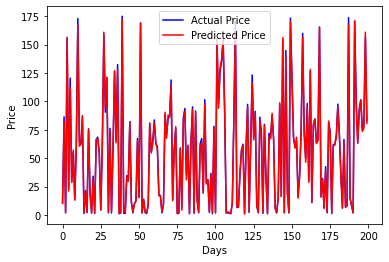

1: Accuracy Score: 0.9822429906542056


In [ ]:
plot_graph(newLSTM, data)
print(str(Look_Step) + ":", "Accuracy Score:", get_accuracy(newLSTM, data))

***Future work***

In [ ]:
print("\n\n Thank you so much for using GO BULLISH. We have a small favor to ask – if you're happy with our services, could you leave an online review on\n")
print("https://docs.google.com/forms/d/e/1FAIpQLScCNOcmVY4SLkAxgYWhiEJdgQufhRdLTud0OkLaHEG5e-XwNg/viewform?usp=sf_link")



 Thank you so much for using GO BULLISH. We have a small favor to ask – if you're happy with our services, could you leave an online review on

https://docs.google.com/forms/d/e/1FAIpQLScCNOcmVY4SLkAxgYWhiEJdgQufhRdLTud0OkLaHEG5e-XwNg/viewform?usp=sf_link


In [ ]:
%%writefile templates/predict.html
<html>
          <head>
              <title>Go Bullish</title>
          </head>
        <body bgcolor="#add8e6">
          <form method="post">
                <input type='text' name='ticker'required='required'placeholder="Enter ticker of the company"/><br>
                <button type='submit'class='btn'>Predict</button>

        </form>    
          {{prediction_text}}

          
          </body>
        </html>

Writing templates/predict.html


FileNotFoundError: ignored

In [ ]:
from flask import Flask, render_template,request
app = Flask(__name__)

@app.route('/')
def predict(tick):
    #For rendering results on HTML GUI
   
    inp = model.load_data()
    mod=create_model(inp)
    output= prediction(mod,inp)
    
    return render_template('predict.html', prediction_text=' Predicted price for the given company is:{}'.format(output))
if __name__ == '__main__':
    app.run(debug=True)
!export FLASK_APP=run.py
!export FLASK_ENV=development
!flask run --host=0.0.0.0